# ASSIGNMENT-7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import cv2
import numpy as np
from scipy.signal.signaltools import wiener
from PIL import Image, ImageFilter 

## [1]. Analog filter

#### Q1 Consider a RC circuit with input voltage Vi = 10V applied to the series RC and output Vo taken from the ends of C with R = 47kΩ and C = 47nF. Find the transfer function of the circuit and plot the frequency and magnitude spectrum. Which kind of filter is this?

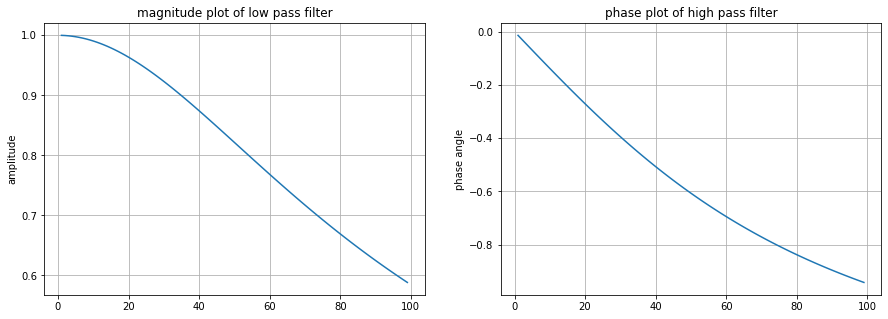

In [2]:
#transfer function
V=10
R=47000  #ohm
C=47*10**(-9)  #ferad
f=np.arange(1,100,1)
w=2*np.pi*f
H=1/(1+ 1j*w*R*C) 
mag=abs(H)
phase=np.angle(H)

Xc=1/(2*np.pi*f*C)
Z=(R**2 +Xc**2)**0.5
Vo=(V*Xc)/Z
Vr=V*R/Z 
PLOT=[mag,phase]
title=['magnitude plot of low pass filter','phase plot of high pass filter']
fig =plt.figure(figsize=(15,5))
label=['amplitude','phase angle']
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(f,PLOT[i])
    plt.title(title[i])
    plt.ylabel(label[i])
    plt.grid()

#### Prove your claim by putting in the frequency as 100Hz and 10000Hz and finding the values of Vo.Find the cutoff frequency and verify that the behaviour is justified.

In [3]:
#cutoff frequency
fc=1/(2*np.pi*R*C)
print("cut-off frequency of this RC circuit is: :",fc,'Hz')
#At f=100 hz
fo=100
Xc=1/(2*np.pi*fo*C)
Z=(R**2 +Xc**2)**0.5
Vo1=(V*Xc)/Z
print("output voltage at 100 Hz is :",Vo1,'volt')
#At f=100 hz
fo=10000
Xc=1/(2*np.pi*fo*C)
Z=(R**2 +Xc**2)**0.5
Vo2=(V*Xc)/Z
print("output voltage at 10000 Hz is :",Vo2,"volt")

cut-off frequency of this RC circuit is: : 72.04841244540305 Hz
output voltage at 100 Hz is : 5.845633851928552 volt
output voltage at 10000 Hz is : 0.07204654251111998 volt


#### Q2 consider the same circuit mentioned before, but now the output voltage is taken across the resistor. Does this change the behaviour of the transfer function? Find the transfer function of the circuit andplot the frequency and magnitude spectrum. Which kind of filter is this?

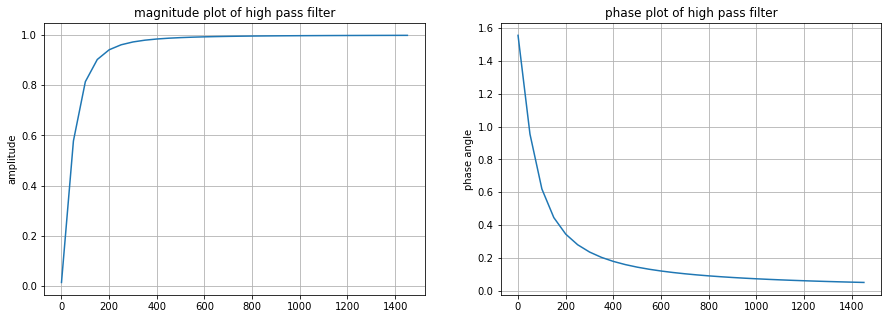

In [4]:
#transfer function
V=10
f=np.arange(1,1500,50)
w=2*np.pi*f
p=1j*w*R*C/(1+ 1j*w*R*C)   #high pass filter
mag=abs(p)
ph=np.angle(p)

Xc=1/(2*np.pi*f*C)
Z=(R**2 + Xc**2)**0.5

Vo=V*R/Z
PLOT=[mag,ph]
label=['amplitude','phase angle']
title=['magnitude plot of high pass filter','phase plot of high pass filter']
fig =plt.figure(figsize=(15,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(f,PLOT[i])
    plt.title(title[i])
    plt.ylabel(label[i])
    plt.grid()

#### Prove your claim by putting in the frequency as 100Hz and 10000Hzand finding the values of Vo Find the cutoff frequency and verify that the behaviour is justified.

In [5]:

#cutoff frequency
fc=1/(2*np.pi*R*C)
print("cut-off frequency of this RC circuit is: :",fc,'Hz')#At f=100 hz
#At f=100 hz
fo=10

Xc=1/(2*np.pi*fo*C)
Z=(R**2 +Xc**2)**0.5
Vo1=(V*R)/Z
print("output voltage at 100 Hz is :",Vo1,'volt')


#At f=10000 hz
fo=10000

Xc=1/(2*np.pi*fo*C)
Z=(R**2 +Xc**2)**0.5
Vo2=(V*R)/Z
print("output voltage at 10000 Hz is :",Vo2,"volt")

cut-off frequency of this RC circuit is: : 72.04841244540305 Hz
output voltage at 100 Hz is : 1.374776808018431 volt
output voltage at 10000 Hz is : 9.999740461417595 volt


#### Q3 Design a second order low pass filter using RC circuit. Do the analysis for R = 50KΩ and C = 50nF. The input voltage waveform is 10 sin 2πt. Plot the amplitude and frequency spectrum.

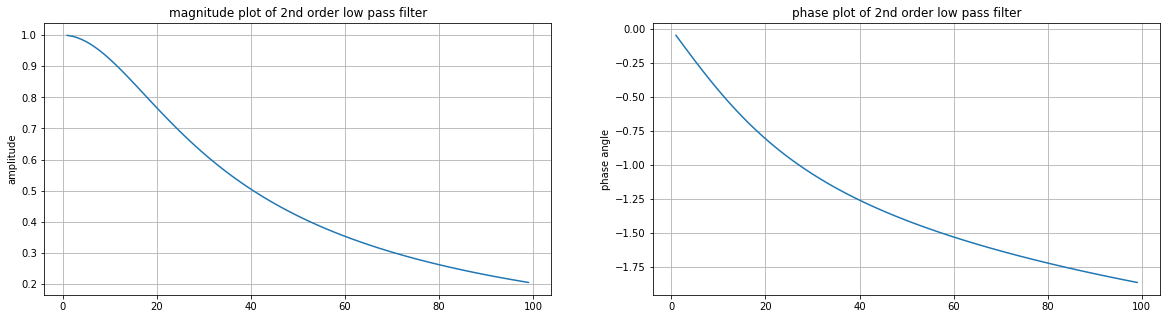

In [6]:
R=50000
C=50*10**(-9)
f=np.arange(1,100,1)
w=2*np.pi*f

H=1/(1+3j*w*C*R + ((1j*w)**2)*(C**2)*(R**2))
amplitude=abs(H)
phase=np.angle(H)
PLOT=[amplitude,phase]
label=['amplitude','phase angle']
title=['magnitude plot of 2nd order low pass filter','phase plot of 2nd order low pass filter']
fig =plt.figure(figsize=(20,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(f,PLOT[i])
    plt.title(title[i])
    plt.ylabel(label[i])
    plt.grid()

#### Q4 Design a band pass filter using cascaded RC circuits. Make use of the values of the 2 resistors as 20KΩ. The filter should pass all the frequencies between 1kHz and 30kHz. Find the transfer function of the same and plot the magnitude and amplitude of the filter.

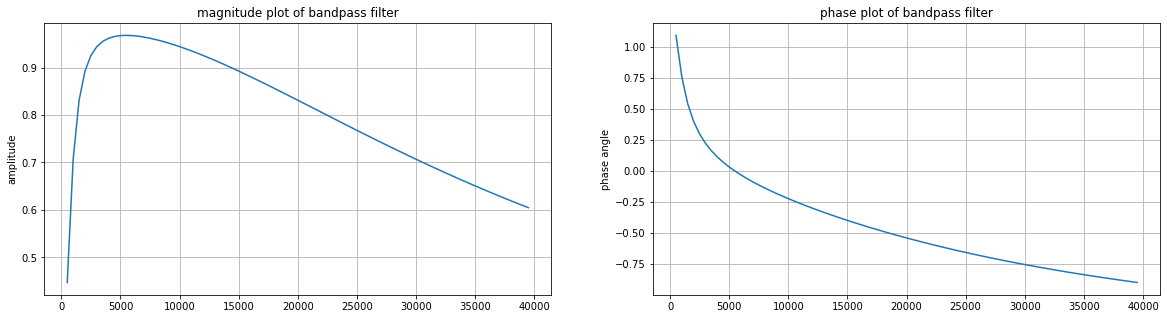

In [7]:
R=20000  #ohm 
f1=1000  #Hz
f2=30000 #Hz
C1=1/(2*np.pi*R*f1)
C2=1/(2*np.pi*R*f2)
#C1=7.9577*10**(-9)
#C2=2.6525*10**(-10)
f=np.arange(500,40000,500)
w=2*np.pi*f

H=((1j*w*R*C1))/((1+1j*w*R*C1)*(1+1j*w*R*C2))
amplitude=abs(H)
phase=np.angle(H)
PLOT=[amplitude,phase]
label=['amplitude','phase angle']
title=['magnitude plot of bandpass filter','phase plot of bandpass filter']
fig =plt.figure(figsize=(20,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(f,PLOT[i])
    plt.title(title[i])
    plt.ylabel(label[i])
    plt.grid()

# [2]Digital filter

#### Q1 Consider the difference equation:y[n] = x[n] + x[n − 1] Find the output of the system to the sequence: x[n] = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10} What kind of filter is this? Compute the transfer function to plot  the frequency and amplitude plots to verify your claim. Consider the sinusoidal input to the filter with unit amplitude. Take the sampling rate to be 1 Hz. Find and plot the filter output.

output of system is:: [ 1  3  5  7  9 11 13 15 17 19 10]


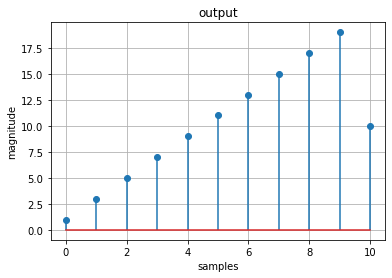

In [8]:
x=[1,2,3,4,5,6,7,8,9,10]  #x(n)
x_1=x[::-1]
x_1.append(0)
x_1=x_1[::-1]
x.append(0)
x=np.array(x)
x_1=np.array(x_1)  #x(n-1)
y=x+x_1 
print("output of system is::",y)
plt.stem(y,use_line_collection=True)
plt.title('output')
plt.ylabel('magnitude')
plt.xlabel('samples')
plt.grid()

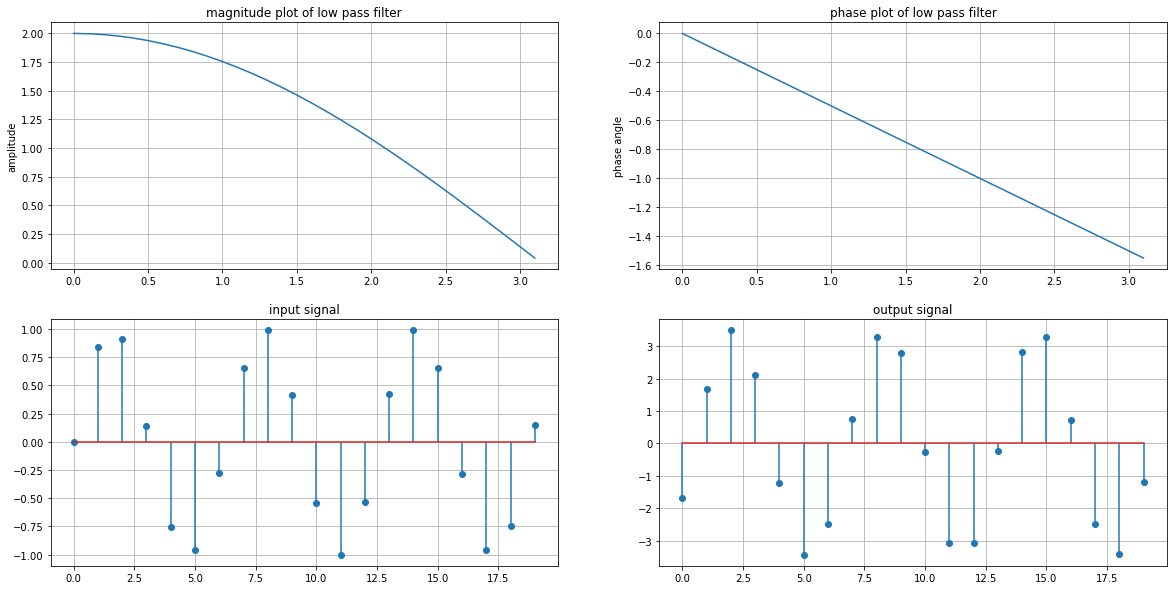

In [9]:
#Transfer function 
w=np.arange(0,np.pi,0.1)
n = np.arange(0,20,1)
H=1+np.exp(-1j*w) #Transfer function is given by
mag=abs(H)
phase=np.angle(H)
input_signal=np.sin(n)
mag_gain = 2*abs(1+np.exp(-1j))
phase_gain = np.arctan(np.sin(1)/(1+np.cos(1))) - 1
output = mag_gain*np.sin(n+phase_gain)
PLOT=[mag,phase,input_signal,output]
x_axis=[w,w,n,n]
label=['amplitude','phase angle']
title=['magnitude plot of low pass filter','phase plot of low pass filter','input signal','output signal']
fig =plt.figure(figsize=(20,10))
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.plot(x_axis[i],PLOT[i])
    plt.title(title[i])
    plt.ylabel(label[i])
    plt.grid()
    
plt.subplot(2,2,3)
plt.stem(n,PLOT[2],use_line_collection=True)
plt.title(title[2])
plt.grid()
plt.subplot(2,2,4)
plt.stem(n,PLOT[3],use_line_collection=True)
plt.title(title[3])
plt.grid()
     

#### Q2 Consider the difference equation:y[n] = 1/3(x[n] + x[n − 1] + x[n−2]) What is this filter called? Compute the transfer function to plot the frequency and amplitude spectrum. What are the applications of this filter?

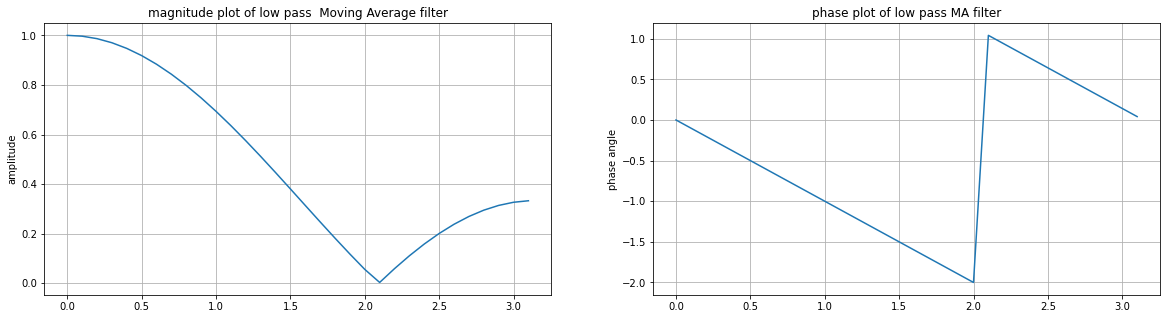

In [13]:
 # Moving Average Filter
w=np.arange(0,np.pi,0.1)
H2=(1/3)*(1+np.exp(-1j*w) + np.exp(-2j*w))   
mag=abs(H2)
phase=np.angle(H2)
PLOT=[mag,phase]

title=['magnitude plot of low pass  Moving Average filter','phase plot of low pass MA filter']
fig =plt.figure(figsize=(20,5))
label=['amplitude','phase angle']
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(w,PLOT[i])
    plt.title(title[i])
    plt.ylabel(label[i])
    plt.grid()

#### Improve the above filter by the differential equation: y[n]=1/4x[n]+1/2x[n −1]+1/4x[n−2]


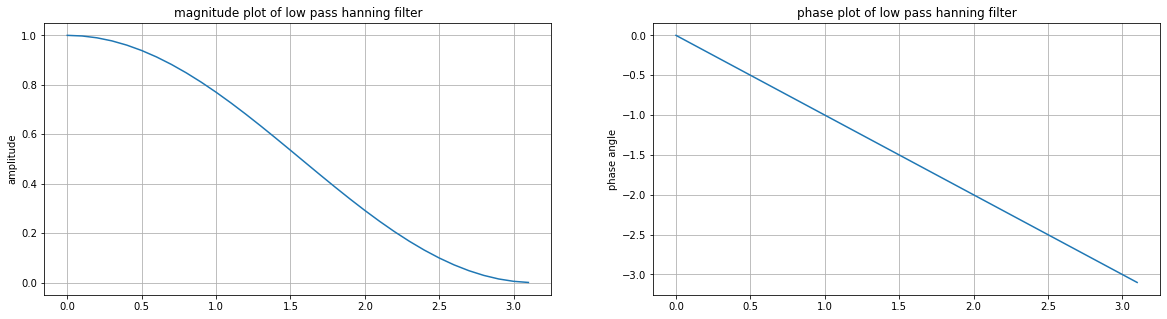

In [14]:
# Low pass hanning filter
H1=(1/4) + (1/2)*np.exp(-1j*w) +(1/4)*np.exp(-2j*w) # Low pass hanning filter
mag=abs(H1)
phase=np.angle(H1)
PLOT=[mag,phase]
label=['amplitude','phase angle']
title=['magnitude plot of low pass hanning filter','phase plot of low pass hanning filter']
fig =plt.figure(figsize=(20,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(w,PLOT[i])
    plt.title(title[i])
    plt.ylabel(label[i])
    plt.grid()

#### Q3 Take any digital image of your choice and apply mean and    medianfiltering. What are the differences between the two?

Text(0.5, 1.0, 'median filtered  image')

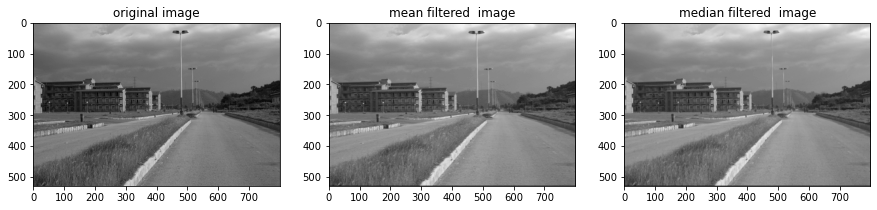

In [16]:
#load the image
imgpath= "C:\\Users\\DELL\\Desktop\\IITG.jpg"   # Read the image
img=cv2.imread(imgpath)
img=np.mean(img,-1)

#mean filter is used for smooting of images

m, n = img.shape   # Obtain number of rows and columns 
mask = np.ones([3, 3], dtype = int) # Develop Averaging filter(3, 3) mask
mask = mask / 9
   
# Convolve the 3X3 mask over the image 
img_new = np.zeros([m, n])
  
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]
        +img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]
        +img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp
          
img_new = img_new.astype(np.uint8)

#median filter

def median_filter(img):
    m, n = img.shape  #find the shape to image
    img_new1 = np.zeros([m, n])
  
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp = [img[i-1, j-1],img[i-1, j],img[i-1, j + 1],img[i, j-1],
                   img[i, j],img[i, j + 1],img[i + 1, j-1],img[i + 1, j],
                   img[i + 1, j + 1]]
          
            temp = sorted(temp)
            img_new1[i, j]= temp[4]
    return img_new1

filtered=median_filter(img)
median_filtered=filtered.astype(np.uint8)
#showing of filtered and orignal images
fig =plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(img_new,cmap=plt.cm.gray)
plt.title('mean filtered  image')

plt.subplot(1,3,3)
plt.imshow(median_filtered,cmap=plt.cm.gray)
plt.title('median filtered  image')

#### Take an image and add speckle noise to it. Use a particular filter to remove this noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


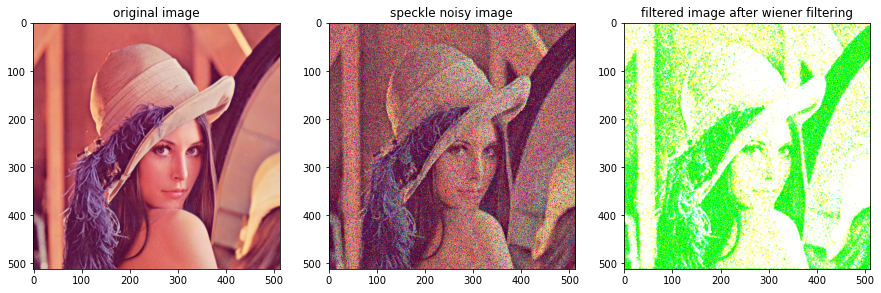

In [17]:
#speckle noise and remove this noise by using wiener filter
img = cv2.imread("C:\\Users\\DELL\\Desktop\\lenna.png" )
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = Image.fromarray(np.uint8(img1))


speckle_noise = np.random.normal(0,1,img1.size)
speckle_noise = speckle_noise.reshape(img1.shape[0],img1.shape[1],img1.shape[2]).astype('uint8')
noisy_image = img + img * speckle_noise
filtered_img = wiener(noisy_image)

plot=[img,noisy_image,filtered_img]
fig =plt.figure(figsize=(15,8))
title=['original image','speckle noisy image','filtered image after wiener filtering']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(plot[i],cmap=plt.cm.gray)
    plt.title(title[i])


#### Take another image and add salt and pepper noise and again use a particular filter to remove the noise. Plot the original images, noisy images and images after noise removal respectively.

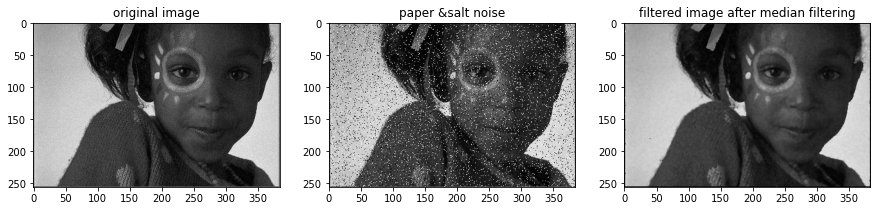

In [18]:
#paper & salt noise and filtering
import random
def add_noise(img):
  
    # Getting the dimensions of the image
    row , col = img.shape

    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        
        y=random.randint(0, row - 1)   # Pick a random y coordinate
        x=random.randint(0, col - 1)   # Pick a random x coordinate
        img[y][x] = 255
        # Color that pixel to white
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
        y=random.randint(0, row - 1)
        x=random.randint(0, col - 1)
        img[y][x] = 0
          
    return img
  

imgpath= "C:\\Users\\DELL\\Desktop\\unifnoisy.jpg"
img1=cv2.imread(imgpath,1)
b=np.mean(img1,-1)
noisy_img=add_noise(b)
filtered_img=median_filter(noisy_img)
median_filtered=filtered_img.astype(np.uint8)
plot=[img1,noisy_img,median_filtered]
fig =plt.figure(figsize=(15,10))
title=['original image','paper &salt noise','filtered image after median filtering']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(plot[i],cmap=plt.cm.gray)
    plt.title(title[i])

#### Q4 Can we convert an analog filter into a digital filter altogether? What is the way to do it? Use the technique to convert all the analog filters into digital filters and plot the amplitude and frequency plots.


Yes, we can convert analog to digital filter using the bilinear transformation. Analog prototype filter into a desired digital filter is the bilinear transformation. 
This method is entirely a frequency-domain method, and as a result, some of the optimal 
properties of the analog filter are preserved.  The bilinear transformation is a change of 
variables (a mapping) that is linear in both the numerator and denominator

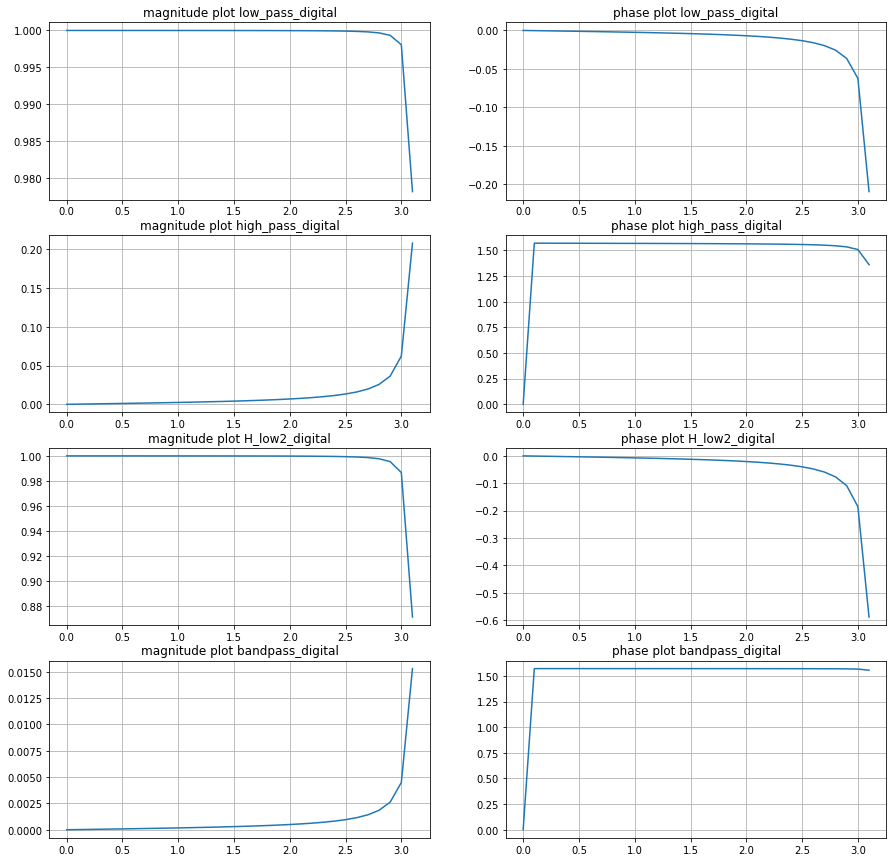

In [19]:
# s=(2/T)((z-1)/(z+1))

R = 47000
C = 47*(10**-9)
f_low = 1 *(10**3)
f_high = 30 *(10**3)
C1 = 1/(2*np.pi*R*f_low)
C2 = 1/(2*np.pi*R*f_high)

f = np.arange(0,10000,0.1)
w = np.arange(0,np.pi,0.1)
T = 1

s = (2/T)*((np.exp(1j*w) - 1)/(np.exp(1j*w) + 1))

low_pass_analog=1/(1+ 1j*2*np.pi*f*R*C) 
low_pass_digital = H=1/(1+ s*R*C) 

high_pass_analog = j*2*np.pi*f*R*C/(1+ 1j*2*np.pi*f*R*C) 
high_pass_digital =s*R*C/(1+ s*R*C) 

H_low2_analog = 1/(1+3j*2*np.pi*f*C*R + ((1j*2*np.pi*f)**2)*(C**2)*(R**2))
H_low2_digital = 1/(1+3*s*C*R + ((s)**2)*(C**2)*(R**2))

bandpass_analog = ((1j*2*np.pi*f*R*C1))/((1+1j*2*np.pi*f*R*C1)*(1+1j*2*np.pi*f*R*C2))
bandpass_digital = ((s*R*C1))/((1+s*R*C1)*(1+s*R*C2))

plot=[low_pass_digital,high_pass_digital,H_low2_digital,bandpass_digital]
title1=['magnitude plot low_pass_digital','magnitude plot high_pass_digital','magnitude plot H_low2_digital','magnitude plot bandpass_digital']
title2=['phase plot low_pass_digital','phase plot high_pass_digital',' phase plot H_low2_digital','phase plot bandpass_digital']
fig =plt.figure(figsize=(15,15))
c=1
for i in range(4):
    plt.subplot(4,2,c)
    plt.plot(w,abs(plot[i]))
    plt.title(title1[i])
    plt.grid()
    c=c+1
    plt.subplot(4,2,c)
    plt.plot(w,np.angle(plot[i]))
    plt.title(title2[i])
    c=c+1
    plt.grid()





